In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
#Read in the Dataset
insurance_df = pd.read_csv('Medical_insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
#Check for Null Values
insurance_df.loc[pd.isna(insurance_df).any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [4]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

#Convert Categorical Values into Numerical Values
label_encoder_1 = LabelEncoder()
label_encoder_1.fit(insurance_df['sex'])
insurance_df['sex_encoded'] = label_encoder_1.transform(insurance_df['sex'])

label_encoder_2 = LabelEncoder()
label_encoder_2.fit(insurance_df['smoker'])
insurance_df['smoker_encoded'] = label_encoder_2.transform(insurance_df['smoker'])

label_encoder_3 = LabelEncoder()
label_encoder_3.fit(insurance_df['region'])
insurance_df['region_encoded'] = label_encoder_3.transform(insurance_df['region'])

insurance_df

C:\Users\bjros\Anaconda3\Lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,2
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,3
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,1
2770,23,male,18.715,0,no,northwest,21595.38229,1,0,1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(insurance_df[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']], insurance_df['charges'], train_size=0.7, test_size=0.3, random_state=42)

In [6]:
X_train

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded
1684,31,1,34.390,3,1,1
862,55,0,33.535,2,0,1
1992,27,0,25.175,0,0,0
889,57,1,33.630,1,0,1
1362,41,1,34.210,1,0,2
...,...,...,...,...,...,...
1638,54,1,34.210,2,1,2
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0


In [7]:
X_test

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded
1106,49,0,29.925,0,0,1
1321,62,1,26.695,0,1,0
2313,57,0,20.100,1,0,3
2274,22,1,39.500,0,0,3
1432,18,0,38.665,2,0,0
...,...,...,...,...,...,...
1900,39,1,28.300,1,1,3
647,40,0,23.370,3,0,0
2438,49,1,29.830,1,0,0
2452,48,1,37.290,2,0,2


In [8]:
y_train

1684    38746.35510
862     12269.68865
1992     3558.62025
889     11945.13270
1362     6289.75490
           ...     
1638    44260.74990
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
Name: charges, Length: 1940, dtype: float64

In [9]:
y_test

1106     8988.15875
1321    28101.33305
2313    12032.32600
2274     1682.59700
1432     3393.35635
           ...     
1900    21082.16000
647      8252.28430
2438     9288.02670
2452     8978.18510
1628    35160.13457
Name: charges, Length: 832, dtype: float64

In [10]:
#Create the Model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

In [11]:
#Train the Model
lin_model.fit(X_train, y_train)

LinearRegression()

In [12]:
#Test the Model to Create Predictions
y_predict = lin_model.predict(X_test)
y_predict

array([ 1.02649672e+04,  3.66129981e+04,  9.04074994e+03,  5.59490022e+03,
        6.39949352e+03,  3.39275230e+04,  5.54235816e+03,  3.91336449e+04,
        1.14847674e+04,  3.26605246e+03,  1.27515733e+04,  1.31124654e+04,
        5.38725852e+03,  1.11772666e+04,  4.44347422e+03,  8.04202605e+03,
        1.00709958e+04,  9.29382056e+03,  4.66502233e+03,  3.75833878e+03,
        1.27164128e+04,  3.27630565e+04,  3.04737205e+04,  3.93395816e+04,
        2.71504276e+04,  9.73752238e+03, -1.44151188e+03,  1.66221112e+04,
        8.02673351e+03, -2.36640147e+02,  1.45179164e+04,  3.70079465e+03,
        2.70090630e+03,  2.42987837e+03,  1.50926975e+04,  1.20711448e+04,
        1.94233238e+03,  2.15943407e+03,  8.03492508e+03,  3.18158294e+04,
        5.96647271e+03,  9.60054672e+03,  1.42972286e+04,  6.62928858e+03,
        1.83696660e+02,  4.04333794e+04,  3.96466204e+03,  3.51379829e+04,
        5.00578546e+03,  7.37195961e+03,  3.61361141e+04,  9.67065503e+03,
        3.63612003e+03,  

In [13]:
#Print the Mean Squared Error
print(f"The mean squared error is: {sklearn.metrics.mean_squared_error(y_test.dropna(axis=0), y_predict)}")

The mean squared error is: 40021847.92669785


In [14]:
#Test the Model Accuracy
r2_score = lin_model.score(X_test, y_test)
r2_score

0.7442179976912258

In [15]:
#Test the Model for Overfitting
#Found the Formula at https://stackoverflow.com/questions/51038820/how-to-calculated-the-adjusted-r2-value-using-scikit
r2_adj_score = (1 - (1 - r2_score) * (1940 - 1) / (1940 - 6))
r2_adj_score

0.7435567205394451

In [16]:
#Create a Test/Prediction DataFrame
prediction_df = pd.DataFrame({'Age': X_test['age'], 'Sex':X_test['sex_encoded'], 'BMI':X_test['bmi'], 'Children':X_test['children'], 'Smoker':X_test['smoker_encoded'], 'Region':X_test['region_encoded'], 'Actual_Charges': y_test, 'Predicted_Charges': y_predict})
prediction_df = prediction_df.reset_index(drop=True)
prediction_df['Index'] = prediction_df.index
prediction_df

,Age,Sex,BMI,Children,Smoker,Region,Actual_Charges,Predicted_Charges,Index
0,49,0,29.925,0,0,1,8988.15875,10264.967238,0
1,62,1,26.695,0,1,0,28101.33305,36612.998134,1
2,57,0,20.100,1,0,3,12032.32600,9040.749936,2
3,22,1,39.500,0,0,3,1682.59700,5594.900215,3
4,18,0,38.665,2,0,0,3393.35635,6399.493523,4
...,...,...,...,...,...,...,...,...,...
827,39,1,28.300,1,1,3,21082.16000,30654.800166,827
828,40,0,23.370,3,0,0,8252.28430,7754.178088,828
829,49,1,29.830,1,0,0,9288.02670,11059.908303,829
830,48,1,37.290,2,0,2,8978.18510,12975.329189,830


In [17]:
from sklearn import feature_selection
from sklearn.preprocessing import FunctionTransformer as transformer

In [18]:
#Print the Correlation Coefficients
print(f"The coefficients are: {lin_model.coef_}")
print(f"The list of features and their corresponding coefficients are: {list(zip(X_test.columns, lin_model.coef_))}")
linear_coef_df = pd.DataFrame({'Features':X_test.columns, 'Coefficients':lin_model.coef_})
linear_coef_df

The coefficients are: [  257.99679272   -34.27981941   315.97392664   511.57633349
 23701.28611944  -347.66207375]
The list of features and their corresponding coefficients are: [('age', 257.9967927200719), ('sex_encoded', -34.279819412326276), ('bmi', 315.9739266419131), ('children', 511.57633349139394), ('smoker_encoded', 23701.28611944258), ('region_encoded', -347.66207374929047)]


,Features,Coefficients
0,age,257.996793
1,sex_encoded,-34.279819
2,bmi,315.973927
3,children,511.576333
4,smoker_encoded,23701.286119
5,region_encoded,-347.662074


In [19]:
#Check the Descriptive Statistics to See What Features Make the Best Predictors
import scipy.stats as stats

#ANOVA_results = stats.kruskal(test_linear_df_X1.dropna(axis=0), test_linear_df_Y1['Life expectancy '].dropna(axis=0))
ANOVA_results = feature_selection.f_regression(X_test.dropna(axis=0), y_test.dropna(axis=0))
#print(f"The selected features are: {selected_features.columns.values}")
#print(f"The F-values are: {ANOVA_results[0]}")
#print(f"The p-values are: {ANOVA_results[1]}")
F_regression_df = pd.DataFrame({'Selected_Features': X_train.columns.values, 'F-values': ANOVA_results[0], 'p-values': ANOVA_results[1]})
#F_regression_df = pd.DataFrame({'Selected_Features': transformer(feature_names_out = 'one-to-one').get_features_names_out(), 'F-values': ANOVA_results[0], 'p-values': ANOVA_results[1]})
#F_regression_df.sort_values('F-values', ascending=False)
F_regression_df1 = pd.merge(F_regression_df, linear_coef_df, how = 'left', left_on = 'Selected_Features', right_on = 'Features')
F_regression_df2 = F_regression_df1.drop(columns='Features', axis = 1)
F_regression_df3 = F_regression_df2.dropna(subset=['F-values', 'p-values'])
F_regression_df4 = F_regression_df3.loc[F_regression_df3['p-values'] <= 0.05]
F_regression_df4.sort_values('Coefficients', ascending=False)

,Selected_Features,F-values,p-values,Coefficients
4,smoker_encoded,1339.840843,2.220614e-175,23701.286119
2,bmi,44.622718,4.375005e-11,315.973927
0,age,92.055264,9.578824e-21,257.996793
1,sex_encoded,4.242364,3.973857e-02,-34.279819


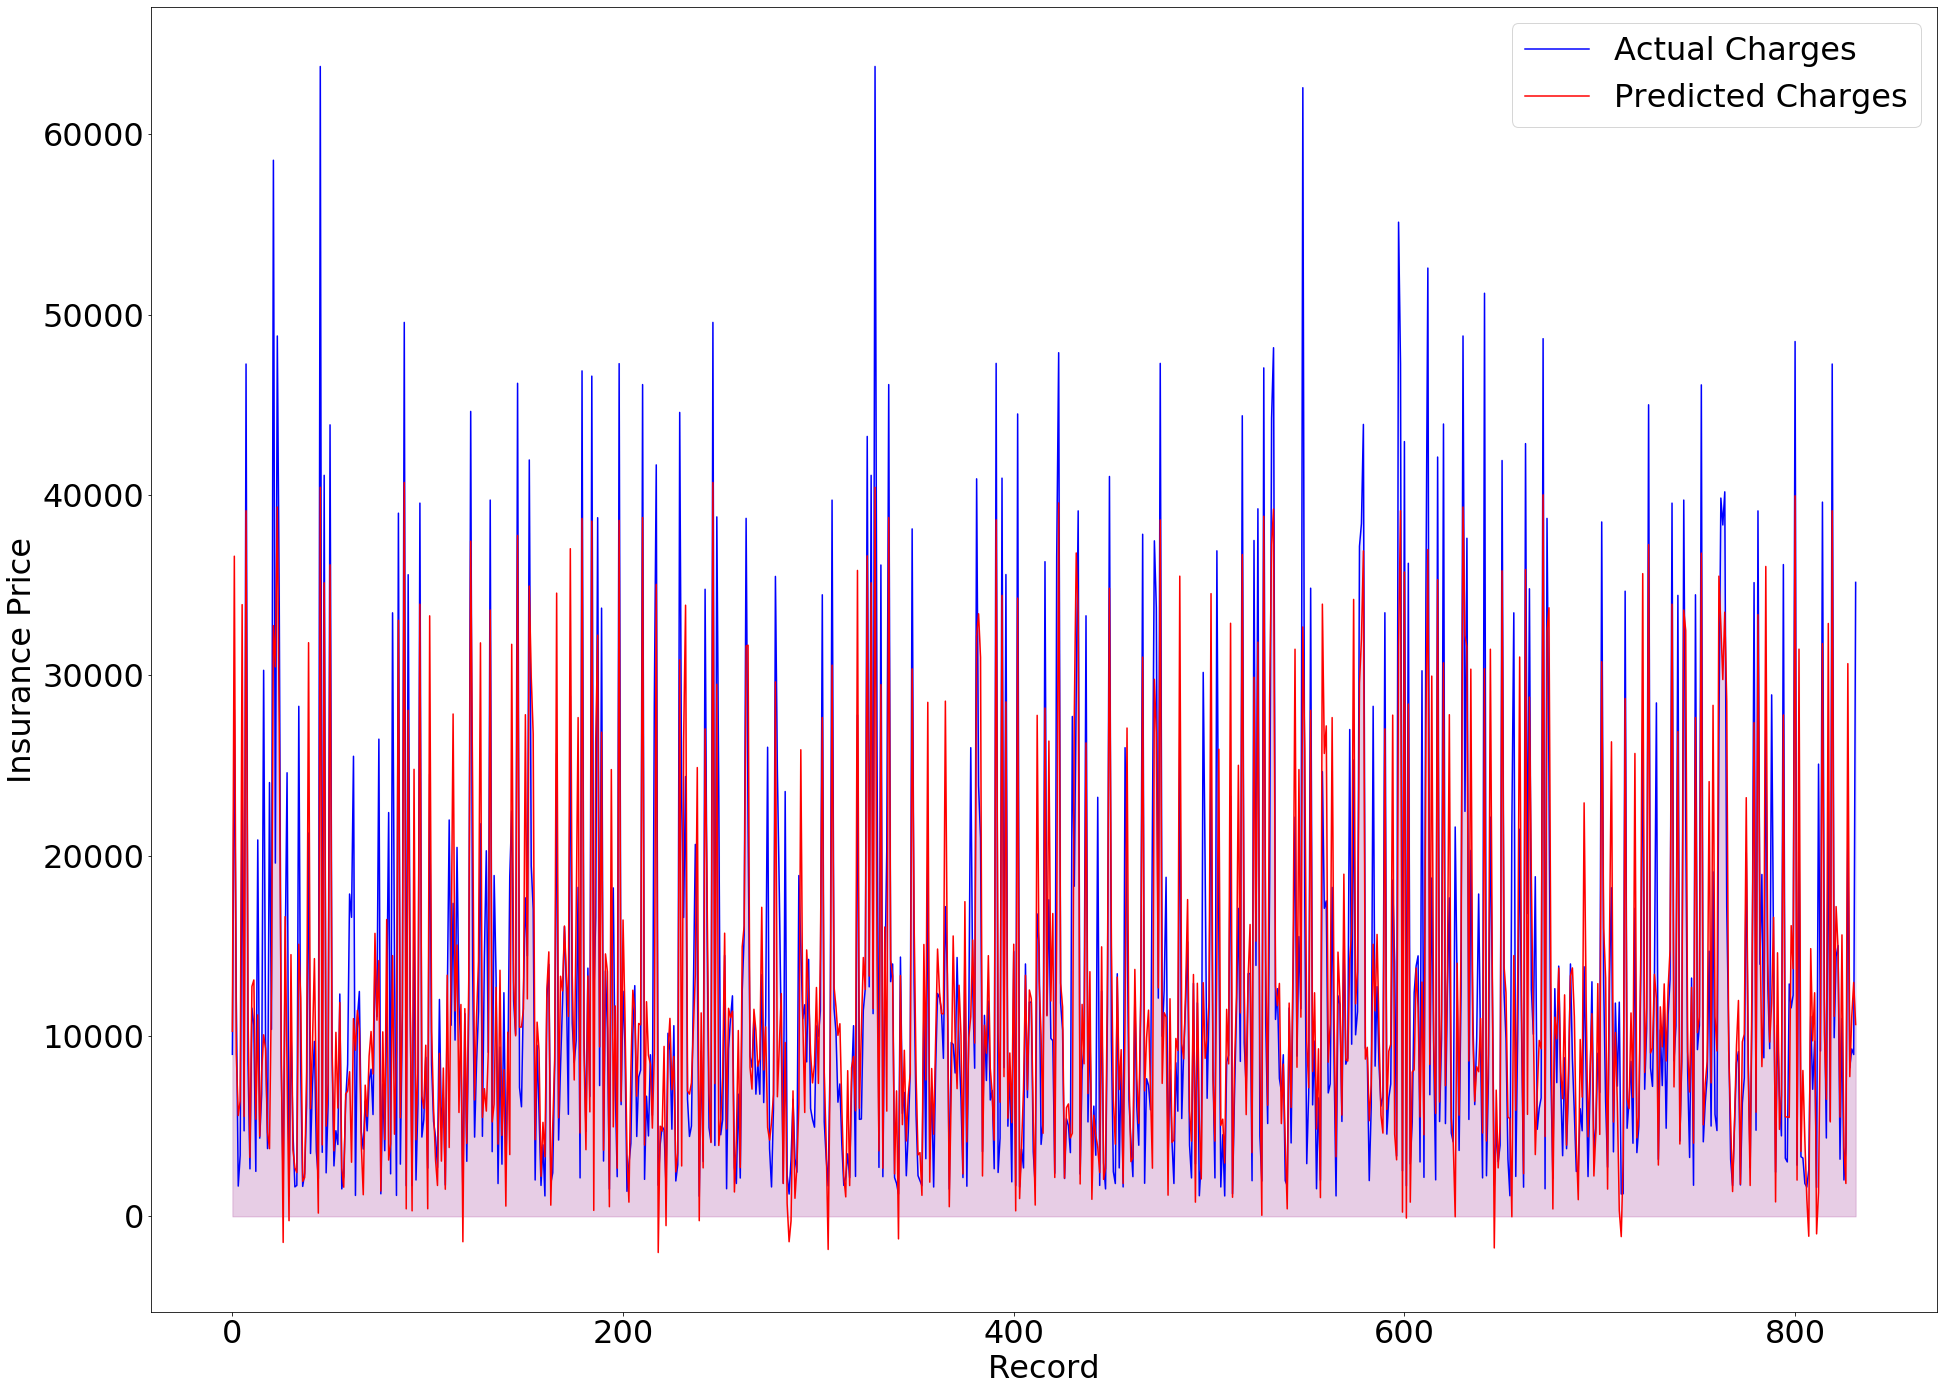

In [23]:
#Graph the Differences Between Actual & Predicted Charges

fig, ax = plt.subplots()
ax.plot(prediction_df['Index'], prediction_df['Actual_Charges'], color='blue', alpha=1.00, label='Actual Charges')
ax.fill_between(prediction_df['Index'], prediction_df['Actual_Charges'], 0, color='blue', alpha=.1)

ax.plot(prediction_df['Index'], prediction_df['Predicted_Charges'], color='red', alpha=1.00, label='Predicted Charges')
ax.fill_between(prediction_df['Index'], prediction_df['Predicted_Charges'], 0, color='red', alpha=.1)
ax.legend()

plt.xlabel('Record')
plt.ylabel('Insurance Price')
plt.rcParams.update({'font.size': 32})
plt.gcf().set_size_inches(32, 24)

plt.show()